In [8]:
## Dingyi Kang
## A20308046
## Assignment1 - problem 1

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
xFilePath = '/content/drive/My Drive/x_train.npy'
yFilePath = '/content/drive/My Drive/y_train.npy'
xTestFilePath = '/content/drive/My Drive/x_test.npy'
yTestFilePath = '/content/drive/My Drive/y_test.npy'

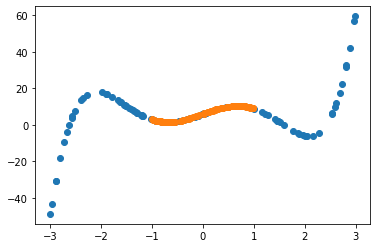

In [18]:
#load the array data from npy files
x = np.load(xFilePath)
y = np.load(yFilePath)
xTest = np.load(xTestFilePath)
yTest = np.load(yTestFilePath)
# plot the relationships between these data
plt.scatter(x, y)
plt.scatter(xTest, yTest)


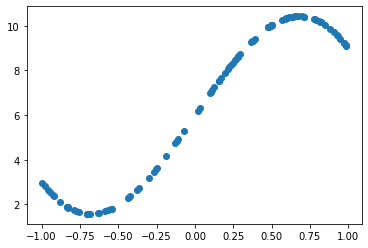

In [ ]:
# plot the relationships between the test data only 
plt.scatter(xTest, yTest)

Apparently, the relationship between x and y is not linear. Based on observation of the plot of xTrainingDataset and yTrainningDataset, and the plot of xTestingDataset and yTestingDataset, and the plots of them together
#### 1
We can see, when x is close to 0, the shape of the relationship is close to a sin function. As the absolut of x gets bigger and bigger, the shape of the relationship is closer to a exponentially grown function.
Hence, I guess the basis functions we may need to add for extracting features may include sin and a function with exponenital growth
#### 2
From the plot we can see, the relationship line is in a special symmetry around x = 0 (i.e., f(x) ~= -f(-x)). Hence, we can infer we don't need to add constant (error) to x
####3
Based on f(0) ~= 6, sin0 = 0, and the relationship line is in a special symmetry around x = 0, the constant error probably is around 6
####4
As we can see from the plot of the test dataset, the sin-like relationship line comes to its climax at 0.75 and -0.75. Given sin(π/2) = 1 and sin(-π/2) = -1, we can infer 0.75 x = π/2, and thus x = 2π/3
Hence, we can apply a scalar of 2π/3 to x
####5
As we can see the plot of the test dataset, the maximum value of the function is around 11 and the minimum value of the function is around 1. Given the base of this function is around 6, we can guess the range of the sin function is from -5 to +5.
Given the range of a normal sin(x) function is from -1 to +1, we can thus apply a scalar of 5 to the sin function
####6
As for function with exponential growth, given f(x)-6 ~= f(-x)-6, we know this function must meet g(x) = -g(x)
Hence, we can initial guess g(x) = x**3

Hence, in summary, the final hypothesized equation of this model is as following:
y = 5 * sin(2π/3 * x) + xp**3 + 6

Hence, the basis functions we can add to the model are sin(2π/3 * x) and x**3

In [ ]:
"""
let's build the model:
y = a*x + b*sin(2π/3 * x) + c*x**3 + d
with initial guess:
a = 0
b = 5
c = 1
d = 6
"""
# theta is the vector of parameters (i.e., a, b, c, d in this case) while X is the matrix of different features
def hypothesis(X, theta):
    y = theta*X
    return np.sum(y, axis=1)

# let's use mean square error function as the loss function
# theta is the vector of parameters
# X is the matrix of different features
# y is the vector of targeted values
def loss(X, y, theta):
    y1 = hypothesis(X, theta)
    # num of rows -- len(X)
    return sum((y1-y)**2)/len(X)

# we develop gradien descent function based on Least Mean Squares update rule
# This function returns two things: one is a vector J which is loss function values associated with each iterations; the second one is the theta with minimized loss function value
def gradientDescent(X, y, theta, leanringRate, iterations):
    J=[]
    k=0
    while k < iterations:
        y1 = hypothesis(X, theta)
        for c in range(0, X.shape[1]):
            theta[c] = theta[c] + leanringRate*sum((y-y1)* X[:, c])/len(X)
        j = loss(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [ ]:
# let's frist build feature matrix X with new features appended
x = np.load(xFilePath)
y = np.load(yFilePath)

coef = 2 * np.pi / 3
# feature sin(2π/3 * x)
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], x)))
# feature x**3
x2 = np.array(list(map(lambda v: v**3, x)))
# constant error -- d
x3 = np.ones(x.shape)
#print(x1)
#print(x2)
#print(x3)
X = np.append(x, x1, axis=1)
X = np.append(X, x2, axis=1)
X = np.append(X, x3, axis=1)

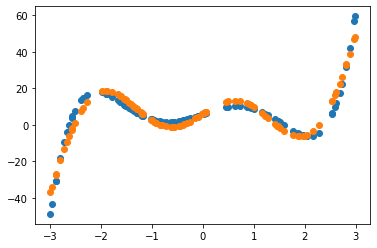

In [ ]:
"""
initial guess:
a = 0
b = 5
c = 1
d = 6
"""
# let's begin to train the model and get the theta with the initial guess which is based on our observation
learningRate = 0.01
numOfIterations = 1000
theta = [0.0, 5.0, 1.0, 6.0]
J, theta = gradientDescent(X, y, theta, learningRate, numOfIterations)
y_pred = hypothesis(X, theta)
plt.scatter(x,y)           
plt.scatter(x, y_pred)
plt.show()

The result theta we got is:
[-11.498705905767162, 14.165277363984496, 2.9059350343391723, 6.098001016249905]

The minimum loss function value we got is:
13.550560451278125



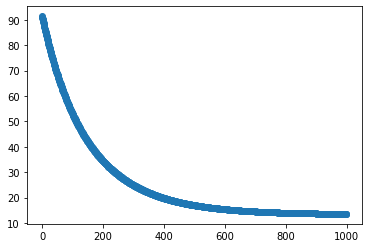

In [ ]:
# plot the loss function values changes during the training
print("The result theta we got is:")
print(theta)
print()
print("The minimum loss function value we got is:") 
print(loss(X, y, theta))
print()
j = np.array(J)
plt.scatter(list(range(0, len(j))), j)

The theta is:
[-11.498705905767162, 14.165277363984496, 2.9059350343391723, 6.098001016249905]

The prediction error is:
4.700868028480196



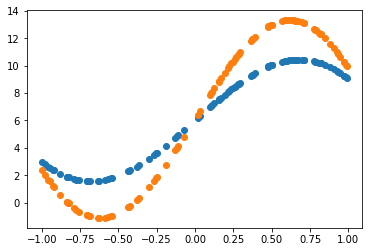

In [ ]:
# then let's test it in test dataset
xTest = np.load(xTestFilePath)
yTest = np.load(yTestFilePath)

coef = 2 * np.pi / 3
# feature sin(2π/3 * x)
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], xTest)))
# feature x**3
x2 = np.array(list(map(lambda v: v**3, xTest)))
# constant error -- d
x3 = np.ones(xTest.shape)

X = np.append(xTest, x1, axis=1)
X = np.append(X, x2, axis=1)
X = np.append(X, x3, axis=1)

# get the predicted values
print("The theta is:")
print(theta)
print()
# get the prediction error
  # convert yTest from a matrix to a vector first
yTest = np.sum(yTest, axis=1)
print("The prediction error is:")
print(loss(X, yTest, theta))
print()
y_pred = hypothesis(X, theta)
# compare the prediction relationship with real relationship in plots
plt.scatter(xTest, yTest)
plt.scatter(xTest, y_pred)

From above, we can see: the model fit well with growth pattern of the actual target values with a low prediction error (4.70)

In [ ]:
# Another function we can try is y = a*x + b*sin(2π/3 * x) + d, which replaces x**3 with x. It also meets the observations we discussed above
"""
let's build the model:
y = a*x + b*sin(2π/3 * x) + d
with initial guess:
a = 10
b = 5
d = 6
"""

x = np.load(xFilePath)
y = np.load(yFilePath)

coef = 2 * np.pi / 3
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], x)))
x2 = np.ones(x.shape)
X = np.append(x, x1, axis=1)
X = np.append(X, x2, axis=1)
#print(X)

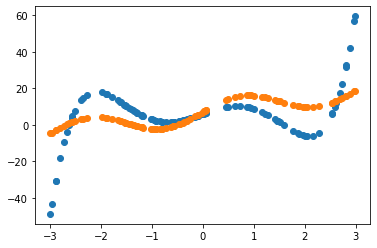

In [ ]:
learningRate = 0.01
numOfIterations = 1000
theta = [4.0, 5.0, 6.0]
J, theta = gradientDescent(X, y, theta, learningRate, numOfIterations)
y_pred = hypothesis(X, theta)
plt.scatter(x,y)           
plt.scatter(x, y_pred)
plt.show()

[3.9654739838643036, 5.919178797640455, 7.0133558577154185]
156.1539736313518


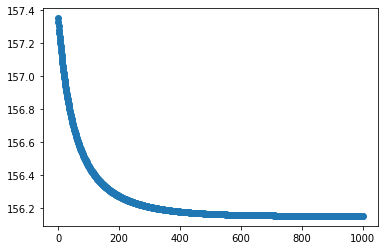

In [ ]:
print(theta) 
print(loss(X, y, theta))
j = np.array(J)
plt.scatter(list(range(0, len(j))), j)

The theta is:
[3.9654739838643036, 5.919178797640455, 7.0133558577154185]
The prediction error is:
16.555120866891517


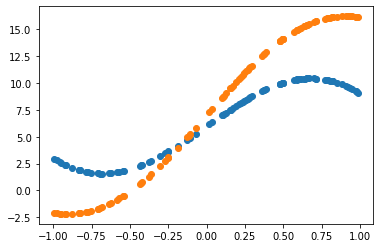

In [ ]:
# then, let's test it in the test dataset
xTest = np.load(xTestFilePath)
yTest = np.load(yTestFilePath)

coef = 2 * np.pi / 3
# feature sin(2π/3 * x)
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], xTest)))
# constant error -- d
x2 = np.ones(xTest.shape)

X = np.append(xTest, x1, axis=1)
X = np.append(X, x2, axis=1)

# get the predicted values
print("The theta is:")
print(theta)
y_pred = hypothesis(X, theta)

# get the prediction error
  # convert yTest from a matrix to a vector first
yTest = np.sum(yTest, axis=1)
print("The prediction error is:")
print(loss(X, yTest, theta))

# compare the prediction relationship with real relationship in plots
plt.scatter(xTest, yTest)
plt.scatter(xTest, y_pred)

In comparsion with the model y = a*x + b*sin(2π/3 * x) + c*x**3 + d, this model fit worst with test data than previous one ( it has a larger prediction error (16.55))

In [ ]:
# lastly, let's try y = a*x + b*sin(2π/3 * x) + c*x**5 + d
"""
with initial guess:
a = 0
b = 5
c = 0.01
d = 6
"""

x = np.load(xFilePath)
y = np.load(yFilePath)

coef = 2 * np.pi / 3
# feature sin(2π/3 * x)
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], x)))
# feature x**5
x2 = np.array(list(map(lambda v: v**5, x)))
# constant error -- d
x3 = np.ones(x.shape)

X = np.append(x, x1, axis=1)
X = np.append(X, x2, axis=1)
X = np.append(X, x3, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


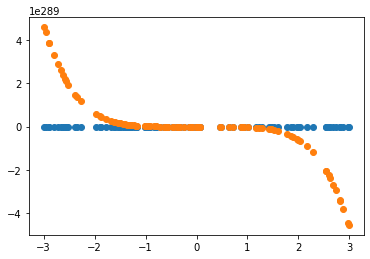

In [ ]:
learningRate = 0.01
numOfIterations = 160
theta = [0.0, 5.0, 0.01, 6.0]
J, theta = gradientDescent(X, y, theta, learningRate, numOfIterations)
y_pred = hypothesis(X, theta)
plt.scatter(x,y)           
plt.scatter(x, y_pred)
plt.show()

[-3.396505850628128e+285, 5.774031549649083e+284, -1.926930212626865e+287, 2.9621292651907044e+283]
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


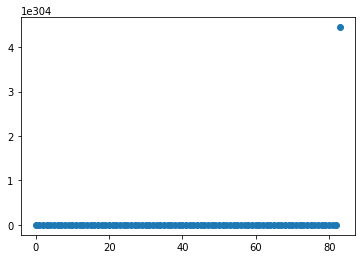

In [ ]:
print(theta) 
print(loss(X, y, theta))
j = np.array(J)
plt.scatter(list(range(0, len(j))), j)

The theta is:
[-3.396505850628128e+285, 5.774031549649083e+284, -1.926930212626865e+287, 2.9621292651907044e+283]
The prediction error is:
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in square


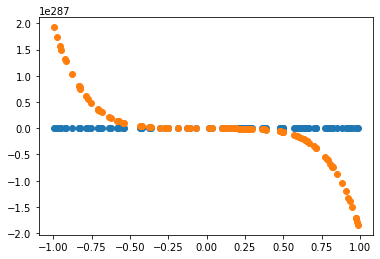

In [ ]:
# then, let's test it in the test dataset
xTest = np.load(xTestFilePath)
yTest = np.load(yTestFilePath)

coef = 2 * np.pi / 3
# feature sin(2π/3 * x)
x1 = np.array(list(map(lambda v: [np.sin(coef * v[0])], xTest)))
# feature x**5
x2 = np.array(list(map(lambda v: v**5, xTest)))
# constant error -- d
x3 = np.ones(xTest.shape)

X = np.append(xTest, x1, axis=1)
X = np.append(X, x2, axis=1)
X = np.append(X, x3, axis=1)

# get the predicted values
print("The theta is:")
print(theta)
y_pred = hypothesis(X, theta)

# get the prediction error
  # convert yTest from a matrix to a vector first
yTest = np.sum(yTest, axis=1)
print("The prediction error is:")
print(loss(X, yTest, theta))

# compare the prediction relationship with real relationship in plots
plt.scatter(xTest, yTest)
plt.scatter(xTest, y_pred)

From the plot and prediction error above, we can see this model doesnt' work because x**5 grow too fast. It just fits around x=0. However, the prediction error get closer to infinite as the absolute value of x grow

## Summary
After a series of comparisons, it turns out our first model, y = a*x + b*sin(2π/3 * x) + c*x**5 + d, with parameter of a = -11.4987, b = 14.1653, c = 2.9059, d = 6.0980, fits the relationship best and give the least prediction error (4.7008).